In [1]:
import pandas as pd

df = pd.read_csv("breast-cancer-wisconsin.data",names=['Id','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Outcome'])

In [2]:
df.head()

,Id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Outcome
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
df.loc[df['Outcome']==2,'Outcome'] = 0
df.loc[df['Outcome']==4,'Outcome'] = 1

In [4]:
df.loc[df['Bare Nuclei']=='?','Bare Nuclei'] = None

In [5]:
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)

In [6]:
feature = df[df.keys().drop('Outcome')]
outcome = df['Outcome']

In [7]:
from sklearn.model_selection import train_test_split

train_feature, test_feature, train_taret, test_target = train_test_split(feature, outcome, stratify=outcome, random_state=42)

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
train_feature_pca = pca.fit_transform(train_feature)
test_feature_pca = pca.transform(test_feature)

In [9]:
pca.explained_variance_ratio_

array([1.00000000e+00, 1.23522802e-10])

In [10]:
pca.explained_variance_ratio_[0]

0.9999999998202623

In [11]:
pca.explained_variance_ratio_[1]

1.2352280244352732e-10

In [12]:
keys = sorted(outcome.unique())

In [13]:
keys

[0, 1]

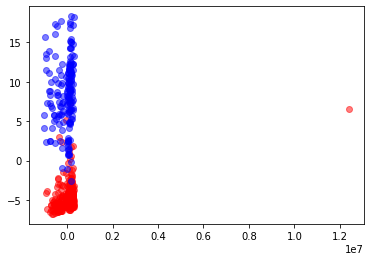

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

color = ["red","blue"]

for k in keys:
    selected_item_feature = train_feature_pca[train_taret==k]
    plt.scatter(selected_item_feature[:,0],selected_item_feature[:,1], c=color[k], alpha=0.5)
plt.show()

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_feature_pca_scaled = scaler.fit_transform(train_feature_pca)
test_feature_pca_scaled = scaler.transform(test_feature_pca)

In [16]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)
clf.fit(train_feature_pca_scaled, train_taret)

DecisionTreeClassifier(random_state=42)

In [17]:
y_pred = clf.predict(test_feature_pca_scaled)

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix

print("Accuracy :",accuracy_score(test_target, y_pred))
print(confusion_matrix(test_target,y_pred, labels=[1,0]))

Accuracy : 0.9707602339181286
[[ 60   0]
 [  5 106]]


In [19]:
from sklearn.ensemble import RandomForestClassifier

clf2 = RandomForestClassifier(n_jobs=-1, random_state=42)
clf2.fit(train_feature_pca_scaled, train_taret)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [20]:
y_pred = clf2.predict(test_feature_pca_scaled)

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix

print("Accuracy :",accuracy_score(test_target, y_pred))
print(confusion_matrix(test_target,y_pred, labels=[1,0]))

Accuracy : 0.9649122807017544
[[ 59   1]
 [  5 106]]


In [22]:
from sklearn.svm import SVC

clf3 = SVC(random_state=42)
clf3.fit(train_feature_pca_scaled, train_taret)

SVC(random_state=42)

In [23]:
y_pred = clf3.predict(test_feature_pca_scaled)

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix

print("Accuracy :",accuracy_score(test_target, y_pred))
print(confusion_matrix(test_target,y_pred, labels=[1,0]))

Accuracy : 0.9649122807017544
[[ 59   1]
 [  5 106]]


In [25]:
from xgboost import XGBClassifier

clf4 = XGBClassifier()
clf4.fit(train_feature_pca_scaled, train_taret)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [26]:
y_pred = clf4.predict(test_feature_pca_scaled)

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix

print("Accuracy :",accuracy_score(test_target, y_pred))
print(confusion_matrix(test_target,y_pred, labels=[1,0]))

Accuracy : 0.9649122807017544
[[ 59   1]
 [  5 106]]
